In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('G:/Download/lol8974/high_diamond_ranked_10min.csv')

In [4]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
data.shape

(9879, 40)

In [5]:
# 缺失值
data.isnull().any()

gameId                          False
blueWins                        False
blueWardsPlaced                 False
blueWardsDestroyed              False
blueFirstBlood                  False
blueKills                       False
blueDeaths                      False
blueAssists                     False
blueEliteMonsters               False
blueDragons                     False
blueHeralds                     False
blueTowersDestroyed             False
blueTotalGold                   False
blueAvgLevel                    False
blueTotalExperience             False
blueTotalMinionsKilled          False
blueTotalJungleMinionsKilled    False
blueGoldDiff                    False
blueExperienceDiff              False
blueCSPerMin                    False
blueGoldPerMin                  False
redWardsPlaced                  False
redWardsDestroyed               False
redFirstBlood                   False
redKills                        False
redDeaths                       False
redAssists  

In [6]:
# 数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

<font size=5>数据分析</font>

# 查看游戏数据找出决定蓝队胜负的相关变量

In [6]:
data.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [7]:
data_blue = data[['gameId','blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']]

In [8]:
data_blue.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [15]:
# 查看蓝队指标两两相关性
data_corr = data_blue.drop(['gameId','blueWins'],axis=1).corr()

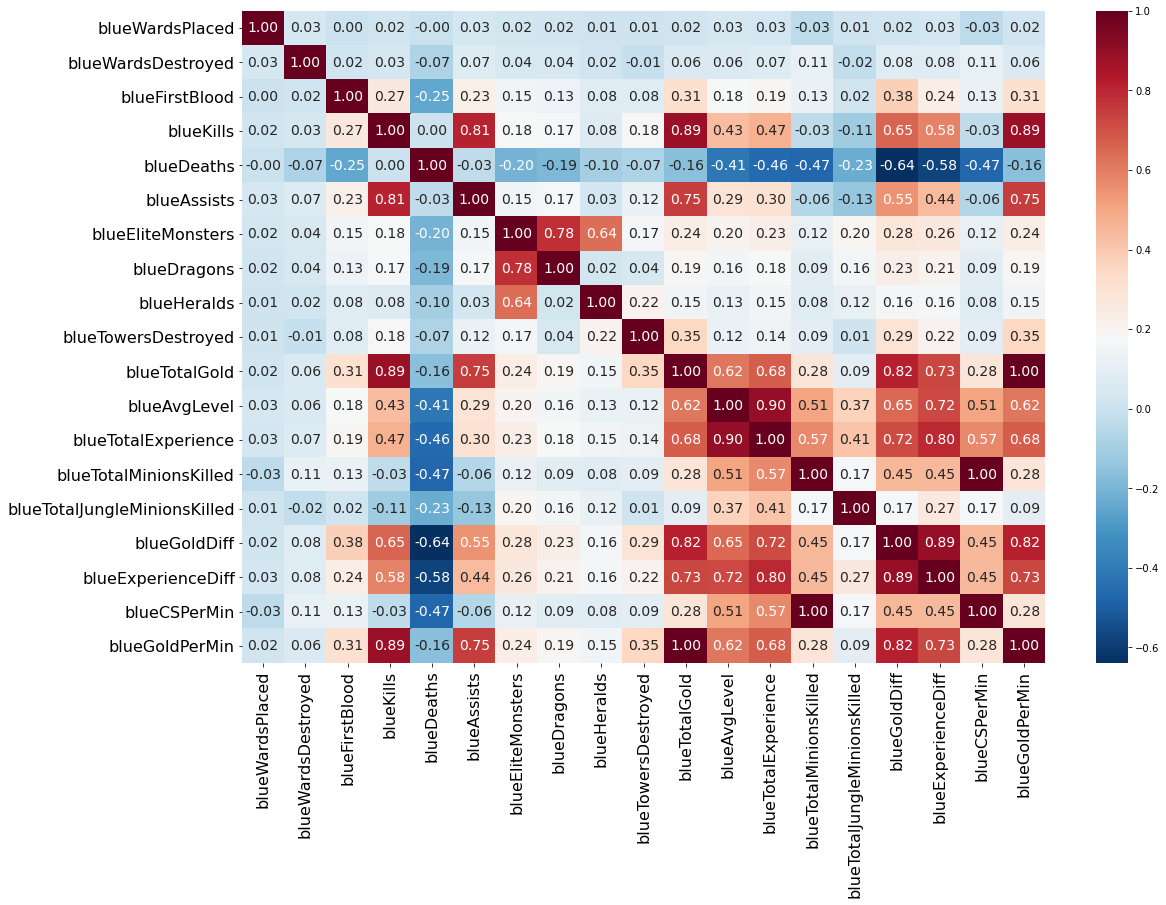

In [16]:
# 热力图体现相关性-做法一：
plt.figure(figsize=(18,12))
sns.heatmap(data_corr,cmap='RdBu_r',annot=True,fmt='.2f',annot_kws={'fontsize':14})
plt.tick_params(axis='x',which='major',labelsize=16,labelrotation=90)
plt.tick_params(axis='y',which='major',labelsize=16)
plt.show()

In [21]:
data_corr

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
blueWardsPlaced,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725
blueWardsDestroyed,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054
blueFirstBlood,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058
blueKills,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751
blueDeaths,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572
blueAssists,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352
blueEliteMonsters,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396
blueDragons,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.020381,0.039750,0.186413,0.160683,0.179083,0.086686,0.159595,0.233875,0.211496,0.086686,0.186413
blueHeralds,0.010104,0.016940,0.077509,0.076195,-0.095527,0.028434,0.640271,0.020381,1.000000,0.217901,0.153974,0.128201,0.152386,0.083509,0.121291,0.162943,0.162496,0.083509,0.153974
blueTowersDestroyed,0.009462,-0.009150,0.083316,0.180314,-0.071441,0.123663,0.166644,0.039750,0.217901,1.000000,0.350941,0.124453,0.139398,0.092291,0.008165,0.294060,0.218320,0.092291,0.350941


In [17]:
# 热力图体现相关性做法二
from itertools import chain

In [22]:
list1 = list(chain(*data_corr.values.tolist()))

In [23]:
k = np.round(list1,2)

In [24]:
list2=[[i,j,k[i*19 + j]]for i in range(19) for j in range(19)]

In [32]:
list2

[[0, 0, 1.0],
 [0, 1, 0.03],
 [0, 2, 0.0],
 [0, 3, 0.02],
 [0, 4, -0.0],
 [0, 5, 0.03],
 [0, 6, 0.02],
 [0, 7, 0.02],
 [0, 8, 0.01],
 [0, 9, 0.01],
 [0, 10, 0.02],
 [0, 11, 0.03],
 [0, 12, 0.03],
 [0, 13, -0.03],
 [0, 14, 0.01],
 [0, 15, 0.02],
 [0, 16, 0.03],
 [0, 17, -0.03],
 [0, 18, 0.02],
 [1, 0, 0.03],
 [1, 1, 1.0],
 [1, 2, 0.02],
 [1, 3, 0.03],
 [1, 4, -0.07],
 [1, 5, 0.07],
 [1, 6, 0.04],
 [1, 7, 0.04],
 [1, 8, 0.02],
 [1, 9, -0.01],
 [1, 10, 0.06],
 [1, 11, 0.06],
 [1, 12, 0.07],
 [1, 13, 0.11],
 [1, 14, -0.02],
 [1, 15, 0.08],
 [1, 16, 0.08],
 [1, 17, 0.11],
 [1, 18, 0.06],
 [2, 0, 0.0],
 [2, 1, 0.02],
 [2, 2, 1.0],
 [2, 3, 0.27],
 [2, 4, -0.25],
 [2, 5, 0.23],
 [2, 6, 0.15],
 [2, 7, 0.13],
 [2, 8, 0.08],
 [2, 9, 0.08],
 [2, 10, 0.31],
 [2, 11, 0.18],
 [2, 12, 0.19],
 [2, 13, 0.13],
 [2, 14, 0.02],
 [2, 15, 0.38],
 [2, 16, 0.24],
 [2, 17, 0.13],
 [2, 18, 0.31],
 [3, 0, 0.02],
 [3, 1, 0.03],
 [3, 2, 0.27],
 [3, 3, 1.0],
 [3, 4, 0.0],
 [3, 5, 0.81],
 [3, 6, 0.18],
 [3, 7, 0.17],

In [25]:
from pyecharts.charts import HeatMap
from pyecharts import options as opts

In [31]:
heat = HeatMap(init_opts=opts.InitOpts(theme='chalk'))
heat.add_xaxis(data_corr.index.to_list())
heat.add_yaxis('',data_corr.index.to_list(),list2)
heat.set_global_opts(title_opts=opts.TitleOpts(title='blue_team各种功能相关性热力图',pos_left='center'),
                     visualmap_opts=opts.VisualMapOpts(min_=-1,max_=1,orient='horizontal',pos_left='right'),
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=60)))
                     
heat.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


结论：很多特征变量高度相关

In [18]:
# 蓝队指标与胜负的相关性
tata = data[data_blue.columns[2:]].apply(lambda x : x.corr(data_blue['blueWins']))
tata.sort_values()

blueDeaths                     -0.339297
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalJungleMinionsKilled    0.131445
blueFirstBlood                  0.201769
blueDragons                     0.213768
blueEliteMonsters               0.221944
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueAssists                     0.276685
blueKills                       0.337358
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueGoldPerMin                  0.417213
blueTotalGold                   0.417213
blueExperienceDiff              0.489558
blueGoldDiff                    0.511119
dtype: float64

In [19]:
from pyecharts.charts import Bar

In [20]:
blue_cor=Bar(init_opts=opts.InitOpts(theme="chalk"))
blue_cor.add_xaxis(list(tata.sort_values().index))
blue_cor.add_yaxis('',np.round(tata.sort_values().values,2).tolist())
# blue_cor.reversal_axis()
blue_cor.set_global_opts(title_opts=opts.TitleOpts(title="蓝队是否胜局与其他指标的相关系数对比",pos_left='center'),
                               xaxis_opts=opts.AxisOpts(name="功能"),
                              yaxis_opts=opts.AxisOpts(name="相关系数"))
blue_cor.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


结论：蓝队‘blueGoldDiff’与胜负正相关系数最大，‘blueDeaths’与胜负负相关

In [21]:
# 删除与胜负相关性不大的特征
cols = []
for i in tata.index:
    if (tata[i]<0.25 and tata[i]>-0.25):
        cols.append(i)

In [22]:
data_blue2 = data_blue.copy()

In [23]:
data_blue2.drop(cols,axis=1,inplace=True)

In [24]:
data_blue2.head()

,gameId,blueWins,blueKills,blueDeaths,blueAssists,blueTotalGold,blueAvgLevel,blueTotalExperience,blueGoldDiff,blueExperienceDiff,blueGoldPerMin
0,4519157822,0,9,6,11,17210,6.6,17039,643,-8,1721.0
1,4523371949,0,5,5,5,14712,6.6,16265,-2908,-1173,1471.2
2,4521474530,0,7,11,4,16113,6.4,16221,-1172,-1033,1611.3
3,4524384067,0,4,5,5,15157,7.0,17954,-1321,-7,1515.7
4,4436033771,0,6,6,6,16400,7.0,18543,-1004,230,1640.0


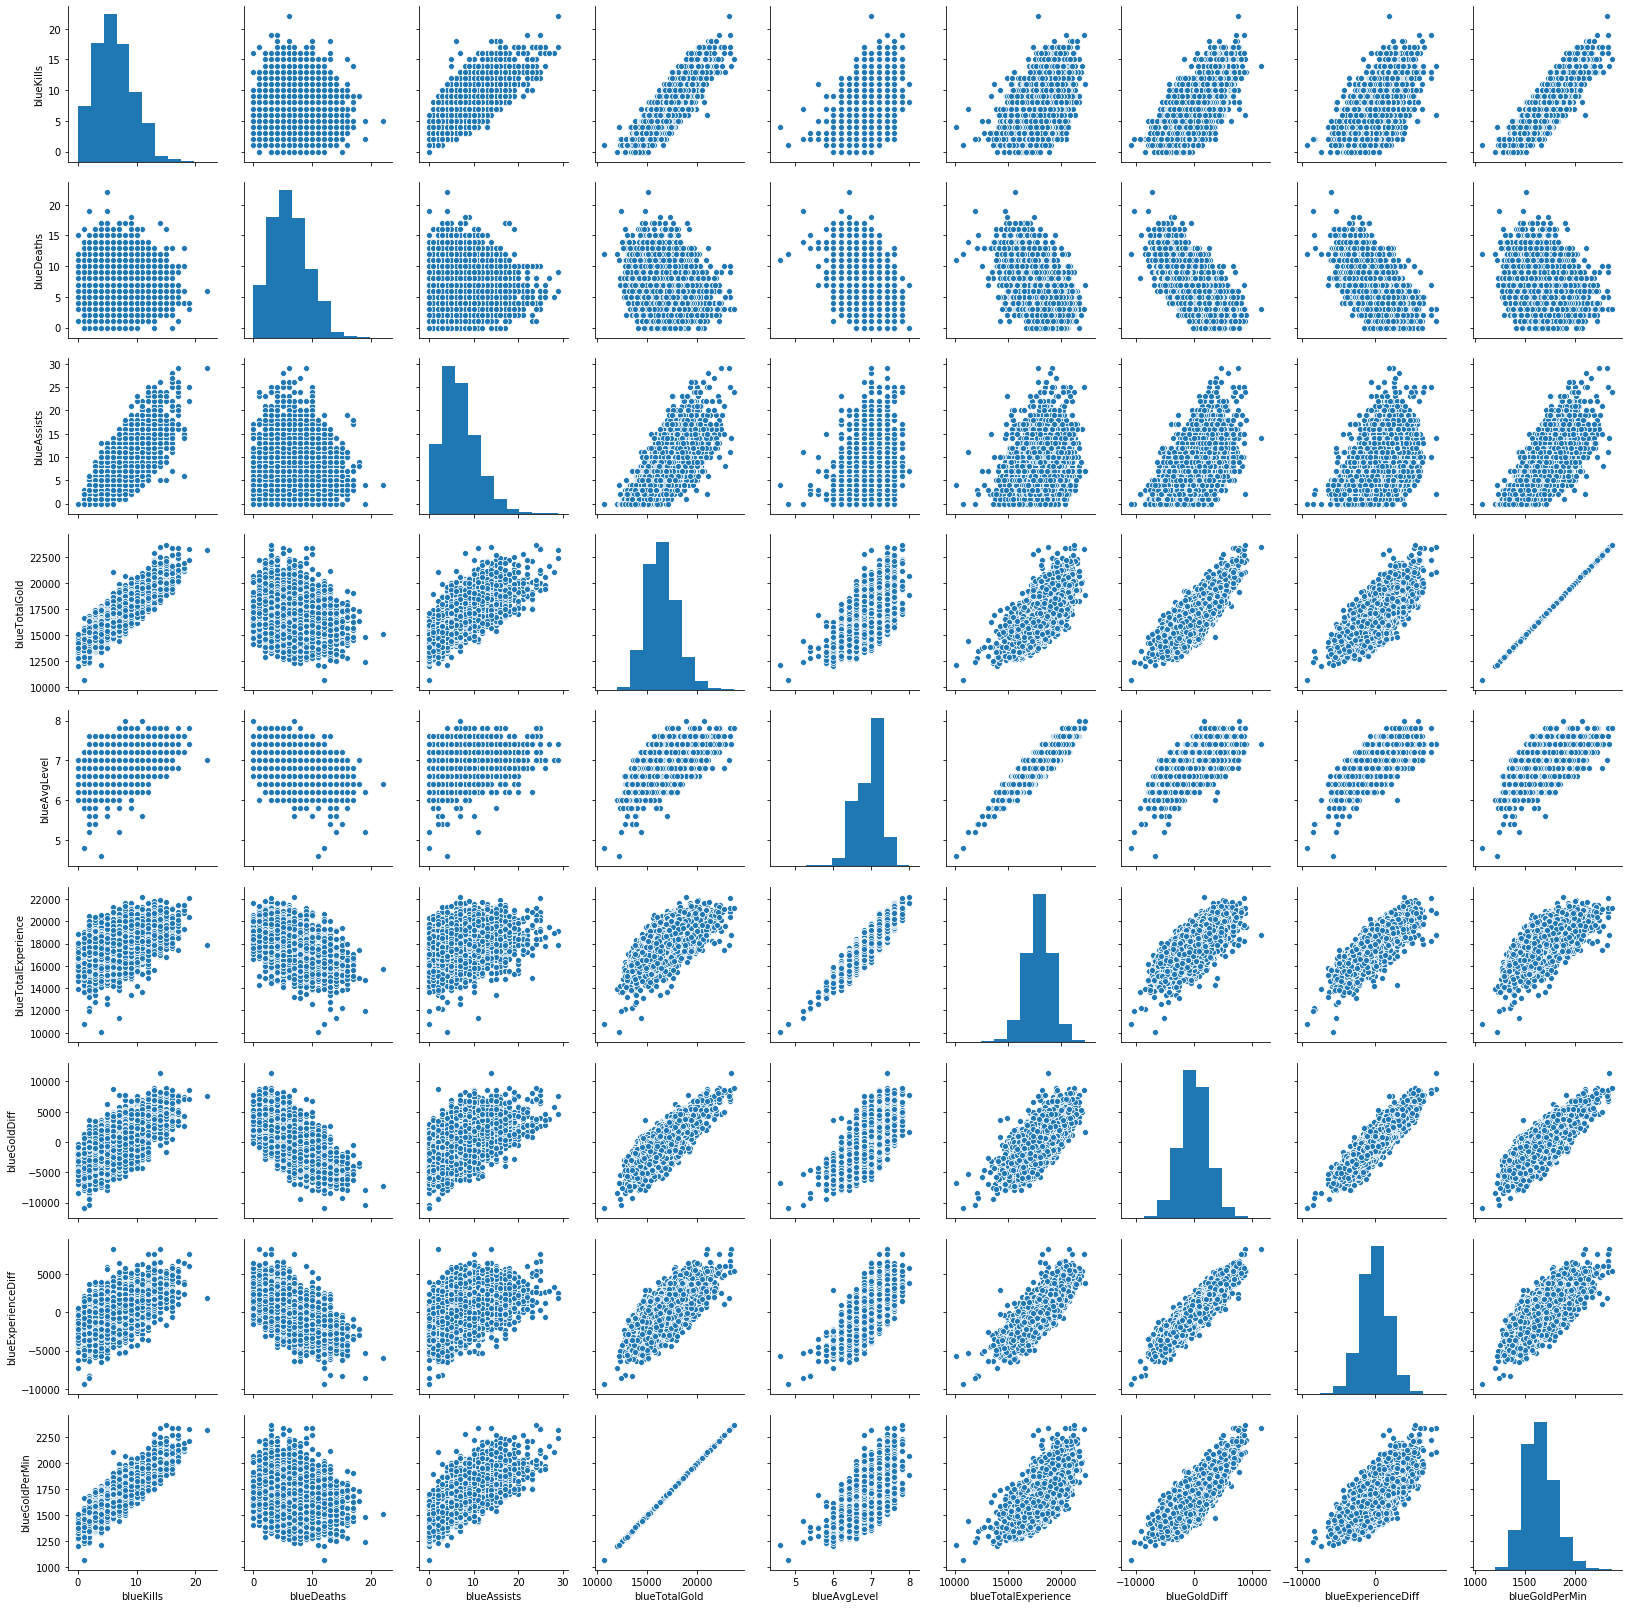

In [25]:
# 查看各种变量的线性关系
sns.pairplot(data_blue2[['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']])

结论：很多变量呈线性关系

In [26]:
# 与蓝队胜负高度相关的特征两两相关性
data_corr2 = data_blue2.drop(['gameId','blueWins'],axis=1).corr()

D:\Anaconda\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


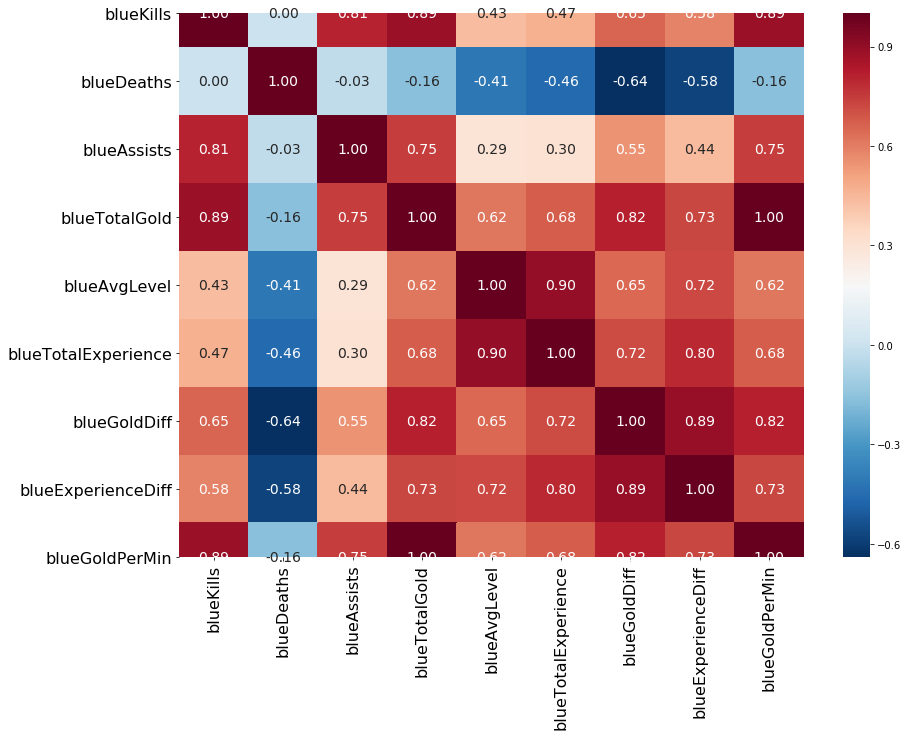

In [27]:
plt.figure(figsize=(14, 10),)
ax = sns.heatmap(data_corr2, cmap='RdBu_r', annot=True, fmt='.2f',annot_kws={'fontsize':14})
plt.tick_params(axis='x',which='major',labelsize=16,labelrotation=90)
plt.tick_params(axis='y',which='major',labelsize=16)

In [36]:
df1_blue1 = data_blue2[data_blue2['blueWins']==1][['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']].mean()

In [37]:
np.round(df1_blue1.values,2).tolist()

[7.2, 5.14, 7.77, 17145.26, 7.03, 18404.58, 1270.72, 908.27, 1714.53]

In [38]:
df1_blue0 = data_blue2[data_blue2['blueWins']==0][['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']].mean()

In [39]:
np.round(df1_blue0.values,2).tolist()

[5.17, 7.13, 5.52, 15864.11, 6.81, 17453.47, -1237.07, -971.9, 1586.41]

In [40]:
data_blue2[data_blue2['blueWins']==1][['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']].max()

blueKills                 22.0
blueDeaths                17.0
blueAssists               29.0
blueTotalGold          23701.0
blueAvgLevel               8.0
blueTotalExperience    22125.0
blueGoldDiff           11467.0
blueExperienceDiff      8348.0
blueGoldPerMin          2370.1
dtype: float64

In [41]:
data_blue2[data_blue2['blueWins']==1][['blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueGoldDiff',
       'blueExperienceDiff', 'blueGoldPerMin']].min()

blueKills                  0.0
blueDeaths                 0.0
blueAssists                0.0
blueTotalGold          12939.0
blueAvgLevel               6.0
blueTotalExperience    14181.0
blueGoldDiff           -6324.0
blueExperienceDiff     -4619.0
blueGoldPerMin          1293.9
dtype: float64

In [42]:
from pyecharts.charts import Radar

In [43]:
data = [
    [7.2, 5.14, 7.77, 17145.26, 7.03, 18404.58, 1270.72, 908.27, 1714.53],
    [5.17, 7.13, 5.52, 15864.11, 6.81, 17453.47, -1237.07, -971.9, 1586.41]
]

In [44]:
radar1 = (Radar(init_opts=opts.InitOpts(theme="chalk",width="900px", height="500px"))
         .add_schema(schema=[
             opts.RadarIndicatorItem(name="blueKills", max_=22,min_=0),
             opts.RadarIndicatorItem(name="blueDeaths", max_=17,min_=0),
             opts.RadarIndicatorItem(name="blueAssists", max_=29,min_=0),
             opts.RadarIndicatorItem(name="blueTotalGold", max_=23701,min_=12939),
             opts.RadarIndicatorItem(name="blueAvgLevel", max_=8,min_=6),
             opts.RadarIndicatorItem(name="blueTotalExperience", max_=22125,min_=14181),
             opts.RadarIndicatorItem(name="blueGoldDiff", max_=11467,min_=-6324),
             opts.RadarIndicatorItem(name="blueExperienceDiff", max_=8348,min_=-4619),
             opts.RadarIndicatorItem(name="blueGoldPerMin", max_=2370.1,min_=1293),
         ]
)
    .add('', data)
    .set_series_opts(label_opts=opts.LabelOpts())
    .set_global_opts(title_opts=opts.TitleOpts(title=""),
                     legend_opts=opts.LegendOpts(orient='vertical',pos_left='right',pos_top='5%'))
)
radar1.render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 使用机器学习模型建立分类分析模型进行蓝队胜负预测

In [45]:
from sklearn.model_selection import train_test_split

In [59]:
x = data_blue.drop(['gameId','blueWins'],axis=1)

In [60]:
y = data_blue['blueWins']

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

## 逻辑回归

In [69]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [65]:
transfer = StandardScaler()
x_train1 = transfer.fit_transform(x_train)
x_test2 = transfer.transform(x_test)

In [66]:
estimator = LogisticRegression()

In [67]:
estimator.fit(x_train1,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_predict = estimator.predict(x_test2)

In [70]:
estimator.score(x_test2,y_test)

0.734412955465587

In [71]:
accuracy_score(y_predict,y_test)

0.734412955465587

## 决策树

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
estimator = DecisionTreeClassifier()

In [74]:
estimator.fit(x_train1,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
estimator.score(x_test2,y_test)

0.6546558704453441

## 随机森林

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
estimator = RandomForestClassifier()

In [78]:
estimator.fit(x_train1,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
estimator.score(x_test2,y_test)

0.7044534412955465

## K近邻

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
estimator = KNeighborsClassifier()

In [84]:
estimator.fit(x_train1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
estimator.score(x_test2,y_test)

0.682591093117409

In [86]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_predict, target_names = ['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1226
           1       0.73      0.74      0.74      1244

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470



# 结论
- 与蓝队胜负高度相关的特征变量为'blueKills', 'blueDeaths', 'blueAssists','blueTotalGold', 'blueAvg'blueTotalExperience', 'blueGoldDiff','blueExperienceDiff', 'blueGoldPerMin'。
- 比较几种模型，逻辑回归模型正确率更高